#         Projet 3 : Préparez des données pour un organisme de santé publique

# Cahier de charges du projet

- L'agence "Santé publique France" a lancé un appel à projets pour trouver des idées innovantes d’applications en lien avec l'alimentation. A cet effet, un jeu de données a été mis a notre disposition par Open Food Fact. 

- **Idée d’application : Système de recommandation produit Halal**

# **Partie 1** : Connaissance des données

# 1.1 Importations des librairies

In [1]:
#Importations des librairies
#------------------------------------------
# projet 3: Préparation des données pour un organisme de santé publique 
# Auteur : Mohamed MERAH
# Date: Octobre 2023
# OpenClassrooms 2023-2024
#-------------------------------------------

import zipfile
import pandas as pd 
import numpy as np
from termcolor import colored
import names
import matplotlib as mpl 
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sb
import missingno 
import missingno as msno
from sklearn.impute import KNNImputer
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
from enum import Enum
from collections import Counter

# 1.2 Dézipper les fichiers

In [2]:
PathZipPr3= "../Ressources/fr.openfoodfacts.org.products.csv.zip"
PathDeZipPr3= "../Ressources/openfoodfacts_csv_Pr3"


zip =zipfile.ZipFile(PathZipPr3,"r")
with zip as z:
    z.extractall(PathDeZipPr3)
    print(z.namelist())

['fr.openfoodfacts.org.products.csv', '__MACOSX/', '__MACOSX/._fr.openfoodfacts.org.products.csv']


 # 1.3 Importation des données

In [3]:
df_data = pd.read_csv('../Ressources/openfoodfacts_csv_Pr3/fr.openfoodfacts.org.products.csv', sep='\t')


In [4]:
df_data

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,3087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,4559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,16087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,16094,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320767,9948282780603,http://world-fr.openfoodfacts.org/produit/9948...,openfoodfacts-contributors,1490631299,2017-03-27T16:14:59Z,1491244498,2017-04-03T18:34:58Z,Tomato & ricotta,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320768,99567453,http://world-fr.openfoodfacts.org/produit/9956...,usda-ndb-import,1489059076,2017-03-09T11:31:16Z,1491244499,2017-04-03T18:34:59Z,"Mint Melange Tea A Blend Of Peppermint, Lemon ...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
320769,9970229501521,http://world-fr.openfoodfacts.org/produit/9970...,tomato,1422099377,2015-01-24T11:36:17Z,1491244499,2017-04-03T18:34:59Z,乐吧泡菜味薯片,Leba pickle flavor potato chips,50 g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320770,9980282863788,http://world-fr.openfoodfacts.org/produit/9980...,openfoodfacts-contributors,1492340089,2017-04-16T10:54:49Z,1492340089,2017-04-16T10:54:49Z,Tomates aux Vermicelles,NaN,67g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 1.3.1 Nombre de lignes

In [5]:
def Nb_lignes_Data(data) : 
    return print ("Nombre de lignes initiales :", data.shape[0],"lignes")

In [6]:
Nb_lignes_Data(df_data) 

Nombre de lignes initiales : 320772 lignes


# 1.3.2 Nombre de colonnes

In [7]:
def Nb_Colonnes_Data(data) : 
    return print ("Nombre de colonnes initiales :", data.shape[1],"colonnes")

In [8]:
Nb_Colonnes_Data(df_data) 

Nombre de colonnes initiales : 162 colonnes


In [9]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Columns: 162 entries, code to water-hardness_100g
dtypes: float64(106), object(56)
memory usage: 396.5+ MB


In [10]:
df_data.dtypes

code                        object
url                         object
creator                     object
created_t                   object
created_datetime            object
                            ...   
carbon-footprint_100g      float64
nutrition-score-fr_100g    float64
nutrition-score-uk_100g    float64
glycemic-index_100g        float64
water-hardness_100g        float64
Length: 162, dtype: object

In [11]:
df_data.columns[0:50]

Index(['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name',
       'generic_name', 'quantity', 'packaging', 'packaging_tags', 'brands',
       'brands_tags', 'categories', 'categories_tags', 'categories_fr',
       'origins', 'origins_tags', 'manufacturing_places',
       'manufacturing_places_tags', 'labels', 'labels_tags', 'labels_fr',
       'emb_codes', 'emb_codes_tags', 'first_packaging_code_geo', 'cities',
       'cities_tags', 'purchase_places', 'stores', 'countries',
       'countries_tags', 'countries_fr', 'ingredients_text', 'allergens',
       'allergens_fr', 'traces', 'traces_tags', 'traces_fr', 'serving_size',
       'no_nutriments', 'additives_n', 'additives', 'additives_tags',
       'additives_fr', 'ingredients_from_palm_oil_n',
       'ingredients_from_palm_oil', 'ingredients_from_palm_oil_tags',
       'ingredients_that_may_be_from_palm_oil_n'],
      dtype='object')

In [12]:
df_data.columns[50:100]

Index(['ingredients_that_may_be_from_palm_oil',
       'ingredients_that_may_be_from_palm_oil_tags', 'nutrition_grade_uk',
       'nutrition_grade_fr', 'pnns_groups_1', 'pnns_groups_2', 'states',
       'states_tags', 'states_fr', 'main_category', 'main_category_fr',
       'image_url', 'image_small_url', 'energy_100g', 'energy-from-fat_100g',
       'fat_100g', 'saturated-fat_100g', 'butyric-acid_100g',
       'caproic-acid_100g', 'caprylic-acid_100g', 'capric-acid_100g',
       'lauric-acid_100g', 'myristic-acid_100g', 'palmitic-acid_100g',
       'stearic-acid_100g', 'arachidic-acid_100g', 'behenic-acid_100g',
       'lignoceric-acid_100g', 'cerotic-acid_100g', 'montanic-acid_100g',
       'melissic-acid_100g', 'monounsaturated-fat_100g',
       'polyunsaturated-fat_100g', 'omega-3-fat_100g',
       'alpha-linolenic-acid_100g', 'eicosapentaenoic-acid_100g',
       'docosahexaenoic-acid_100g', 'omega-6-fat_100g', 'linoleic-acid_100g',
       'arachidonic-acid_100g', 'gamma-linolenic-

In [13]:
df_data.columns[100:162]

Index(['cholesterol_100g', 'carbohydrates_100g', 'sugars_100g', 'sucrose_100g',
       'glucose_100g', 'fructose_100g', 'lactose_100g', 'maltose_100g',
       'maltodextrins_100g', 'starch_100g', 'polyols_100g', 'fiber_100g',
       'proteins_100g', 'casein_100g', 'serum-proteins_100g',
       'nucleotides_100g', 'salt_100g', 'sodium_100g', 'alcohol_100g',
       'vitamin-a_100g', 'beta-carotene_100g', 'vitamin-d_100g',
       'vitamin-e_100g', 'vitamin-k_100g', 'vitamin-c_100g', 'vitamin-b1_100g',
       'vitamin-b2_100g', 'vitamin-pp_100g', 'vitamin-b6_100g',
       'vitamin-b9_100g', 'folates_100g', 'vitamin-b12_100g', 'biotin_100g',
       'pantothenic-acid_100g', 'silica_100g', 'bicarbonate_100g',
       'potassium_100g', 'chloride_100g', 'calcium_100g', 'phosphorus_100g',
       'iron_100g', 'magnesium_100g', 'zinc_100g', 'copper_100g',
       'manganese_100g', 'fluoride_100g', 'selenium_100g', 'chromium_100g',
       'molybdenum_100g', 'iodine_100g', 'caffeine_100g', 'taurine_10

In [14]:
df_data.columns

Index(['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name',
       'generic_name', 'quantity',
       ...
       'ph_100g', 'fruits-vegetables-nuts_100g',
       'collagen-meat-protein-ratio_100g', 'cocoa_100g', 'chlorophyl_100g',
       'carbon-footprint_100g', 'nutrition-score-fr_100g',
       'nutrition-score-uk_100g', 'glycemic-index_100g',
       'water-hardness_100g'],
      dtype='object', length=162)

# **Partie 2 : Qualité du jeu de données**

# 2.1 **Données dupliquées**

 # 2.1.1 Nombre de données dupliquées

In [15]:
# Nombre de données dupliquées 

def Nb_Data_Dupliq(data) :
    return print("Nombre de données dupliquées :",data.duplicated().sum())

In [16]:
Nb_Data_Dupliq(df_data) 

Nombre de données dupliquées : 0


 # 2.1.2 Colonnes dupliquées

# 2.1.2.1 Nombre de Colonnes ayant le même nom

In [17]:
def Nb_Colonnes_Meme_Nom (data) :
    return ("Nombre de Colonnes ayant le même nom :",data.columns.duplicated().sum())

In [18]:
Nb_Colonnes_Meme_Nom (df_data)

('Nombre de Colonnes ayant le même nom :', 0)

# 2.1.2.2 La liste de colonnes dupliquées

In [19]:
## la liste de colonnes dupliquées
def Liste_Colonnes_Duplic(data) :
    duplicateColNames = set()

    for x in range(data.shape[1]):
        col = data.iloc[:, x]

        for y in range(x + 1, data.shape[1]):
            Col = data.iloc[:, y]

            if col.equals(Col):
                duplicateColNames.add(data.columns.values[y])

    return list(duplicateColNames)


Nb_Colonnes_duplique = Liste_Colonnes_Duplic(df_data)
Nb_Colonnes_duplique

['butyric-acid_100g',
 'lignoceric-acid_100g',
 'chlorophyl_100g',
 'caproic-acid_100g',
 'cerotic-acid_100g',
 'ingredients_from_palm_oil',
 'nervonic-acid_100g',
 'ingredients_that_may_be_from_palm_oil',
 'erucic-acid_100g',
 'elaidic-acid_100g',
 'glycemic-index_100g',
 'water-hardness_100g',
 'melissic-acid_100g',
 'mead-acid_100g',
 'nutrition_grade_uk']

 # 2.1.2.3 Nombre de colonnes dupliquées

In [20]:
def Nb_Colonnes_Duplic(data) :
    return (len(Liste_Colonnes_Duplic(data)))

In [21]:
Nb_Colonnes_Duplic(df_data) 

15

# 2.1.2.4 Taux de colonnes dupliquées

In [22]:
def Taux_Colonnes_Duplic(data) :
    Taux_Colonnes_Duplique = (len (Liste_Colonnes_Duplic(df_data)))/(df_data.shape[1])
    return print('Taux de colonnes dupliquées: ',round(Taux_Colonnes_Duplique*100,2),'%')


In [23]:
Taux_Colonnes_Duplic(df_data)

Taux de colonnes dupliquées:  9.26 %


# 2.1.3 Lignes dupliquées

# 2.1.3.1 Nombre de lignes dupliquées

In [24]:
def Nb_Lignes_duplic(data) :
    return len(data)-len(data.drop_duplicates())

In [25]:
Nb_Lignes_duplic(df_data)

0

# 2.1.3.2 Taux de lignes dupliquées

In [26]:
def Taux_lignes_duplic (data) :
    Taux_lignes_duplique = Nb_Lignes_duplic(data)/len(data)
    return print('Taux des données manquantes est : ',round(Taux_lignes_duplique*100,2),'%')


In [27]:
Taux_lignes_duplic (df_data) 

Taux des données manquantes est :  0.0 %


# 2.2 **Données manquantes**

# 2.2.1 Pourcentage des données manquantes

In [28]:
#Pourcentage des données manquantes
def Taux_Data_Manquantes (data) :
    return print('Taux des données manquantes est : ',round(data.isna().mean().mean()*100,2),'%')

In [29]:
Taux_Data_Manquantes (df_data)

Taux des données manquantes est :  76.22 %


In [30]:
def Graph_Pie_NaN(data):

    Nb_lignes = data.shape[0] 
    Nb_colonnes = data.shape[1]

    # Nombre de données non manquante
    Nb_data = data.count().sum()

    # Nombre de données totale de ce jeu de données (colonnes*lignes)
    Nb_totale = (Nb_colonnes*Nb_lignes)

    #taux remplissage jeu de données
    rate_data = (Nb_data/Nb_totale)
    print("Le jeux de données est rempli à {:.2%}".format(rate_data))
    print("et il a {:.2%} de données manquantes".format(1-rate_data))
    print(" ")
    print(" ")

    # Pie Plot
    rates = [rate_data, 1 - rate_data]
    labels = ["Données", "NaN"]

    explode =(0,0.1) 
    colors = ['gold', 'pink']
    # Plot
    plt.figure(figsize=(12,15))
    plt.pie(rates, explode=explode, labels=labels, colors=colors, autopct='%.2f%%', shadow=True, textprops={'fontsize': 20})

    ttl=plt.title("Taux de remplissage du jeu de données", fontsize = 20)
    ttl.set_position([0.5, 0.85])

    plt.axis('equal')
    #ax.legend(labels, loc = "upper right", fontsize = 18)
    plt.tight_layout() 

    plt.show()


Le jeux de données est rempli à 23.78%
et il a 76.22% de données manquantes
 
 


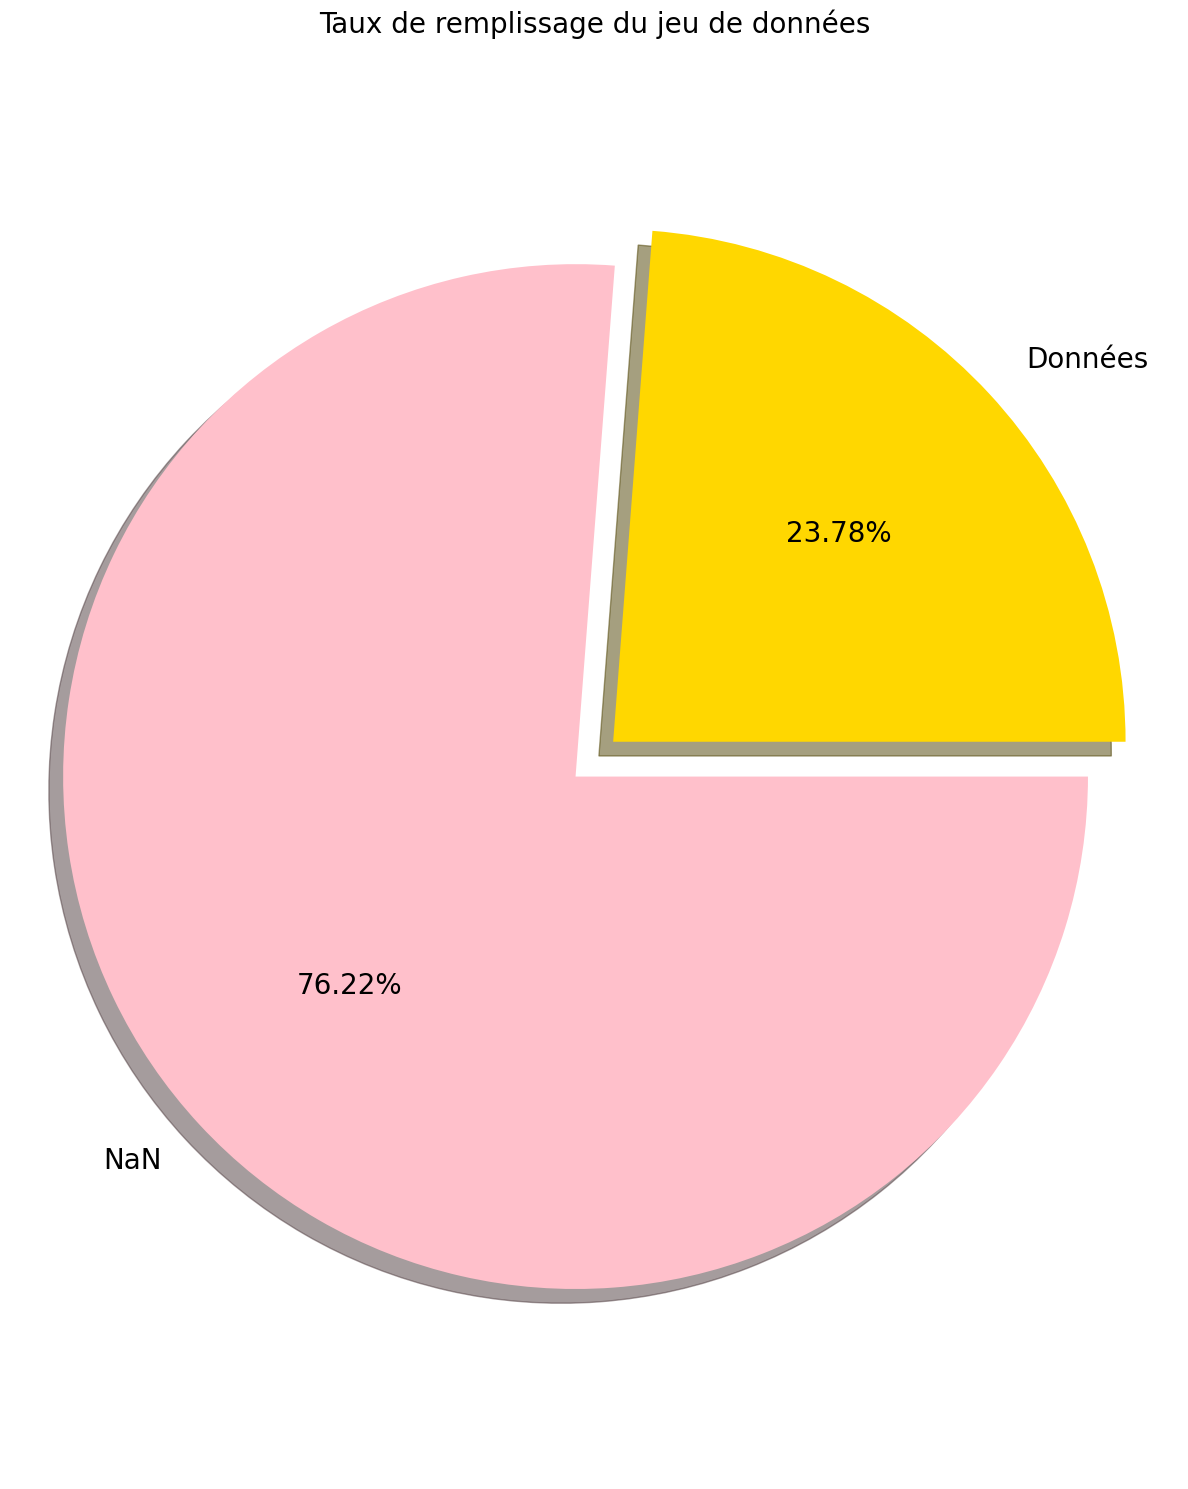

In [31]:
 Graph_Pie_NaN(df_data)

# 2.2.2 Nombre de données manquantes 

In [32]:
def Nb_Data_Manquantes (data) :
    print('Nombre de données manquantes est : ', data.isnull().values.sum())

In [33]:
Nb_Data_Manquantes(df_data)

Nombre de données manquantes est :  39608589


# 2.2.3 Le nombre de données manquantes de chaque colonne

In [34]:
def Data_Missing_column(data):
    # Utiliser la méthode "isnull" pour identifier les valeurs manquantes
    Data_Missing_column_NaN = data.isnull()
    # Appliquer la méthode "sum" par colonne pour compter les valeurs manquantes par colonne
    Data_Missing_column_count = Data_Missing_column_NaN.sum()
    return  Data_Missing_column_count.sort_values()

In [35]:
Data_Missing_column(df_data)

last_modified_t                               0
last_modified_datetime                        0
creator                                       2
created_t                                     3
created_datetime                              9
                                          ...  
ingredients_that_may_be_from_palm_oil    320772
ingredients_from_palm_oil                320772
no_nutriments                            320772
nervonic-acid_100g                       320772
water-hardness_100g                      320772
Length: 162, dtype: int64

# 2.2.4 Taux de données manquantes de chaque colonnes

In [36]:
# Taux de données manquantes de chaque colonnes
def Taux_Data_Manquantes_Col(data) :
    print("Taux de données manquantes de chaque colonne est :")
    Taux_Data_Manquantes_Colonnes= data.isnull().mean()*100
    print(round(Taux_Data_Manquantes_Colonnes),'%')

In [37]:
Taux_Data_Manquantes_Col(df_data) 

Taux de données manquantes de chaque colonne est :
code                         0.0
url                          0.0
creator                      0.0
created_t                    0.0
created_datetime             0.0
                           ...  
carbon-footprint_100g      100.0
nutrition-score-fr_100g     31.0
nutrition-score-uk_100g     31.0
glycemic-index_100g        100.0
water-hardness_100g        100.0
Length: 162, dtype: float64 %


# **Partie 3 : Nettoyage des données**

# 3.1 **Nettoyage des colonnes**

# 3.1.1 Identification des colonnes vides

In [38]:
#Nombre de colonnes vides
def Nb_Colonnes_Vides(data) :
    print("Nombre de colonnes vides :",data.isna().all(axis=0).sum())

In [39]:
Nb_Colonnes_Vides(df_data) 

Nombre de colonnes vides : 16


In [40]:
#Pourcentage de colonnes entierement vides
def Taux_Colonnes_Vides(data) :
    Pourcentage_Colonnes_vides =df_data.isnull().all().sum().sum()/data.shape[1]
    return print("Pourcentage de colonnes vides :",round( Pourcentage_Colonnes_vides*100,2),'%')

In [41]:
Taux_Colonnes_Vides(df_data)

Pourcentage de colonnes vides : 9.88 %


In [42]:
#la liste des colonnes vides
def Liste_Colonnes_Vides(data):
    Cols_Vides = [col for col in data.columns if data[col].isnull().all()]
    return Cols_Vides

In [43]:
Liste_Colonnes_Vides(df_data)

['no_nutriments',
 'ingredients_from_palm_oil',
 'ingredients_that_may_be_from_palm_oil',
 'nutrition_grade_uk',
 'butyric-acid_100g',
 'caproic-acid_100g',
 'lignoceric-acid_100g',
 'cerotic-acid_100g',
 'melissic-acid_100g',
 'elaidic-acid_100g',
 'mead-acid_100g',
 'erucic-acid_100g',
 'nervonic-acid_100g',
 'chlorophyl_100g',
 'glycemic-index_100g',
 'water-hardness_100g']

# 3.1.2 Suppression des colonnes vides

In [44]:
#Suppression des colonnes vides
def Deleted_Colonnes_Vides(data) :
    data.drop(Liste_Colonnes_Vides(data), axis=1, inplace=True)
    #data.drop(cols_vides, axis=1, inplace=True)
    return print("Nombre de colonnes vides après la suppression :",data.isna().all(axis=0).sum())


In [45]:
Deleted_Colonnes_Vides(df_data) 

Nombre de colonnes vides après la suppression : 0


In [46]:
print("Nombre de colonnes après la suppression des lignes vides :",df_data.shape[1])


Nombre de colonnes après la suppression des lignes vides : 146


# 3.1.3 Identification des colonnes ayant plus de 40% valeur manquantes

In [47]:
#Afficher les colonnes ayant plus d'un seuil 40 % valeur manquantes
def Liste_Colonne_Seuil_NaN(data,Seuil):  
    Taux_Data_Manquantes_Colonnes = (data.isnull().mean()*100).sort_values(ascending=False).reset_index()
    Taux_Data_Manquantes_Colonnes.columns = ['Variable','Taux_Data_NaN'] 
    Taux_NaN_Colonne_Seuil = Taux_Data_Manquantes_Colonnes[Taux_Data_Manquantes_Colonnes.Taux_Data_NaN >=Seuil] 
    print("Nombre de colonnes ayant plus de 40% valeur manquantes est :",len(Taux_NaN_Colonne_Seuil))
    print("La liste de colonnes ayant plus de 40% de valeurs manquantes est :",Taux_NaN_Colonne_Seuil["Variable"].tolist())
    return Taux_NaN_Colonne_Seuil

In [48]:
Liste_Colonne_Seuil_NaN(df_data,40)

Nombre de colonnes ayant plus de 40% valeur manquantes est : 112
La liste de colonnes ayant plus de 40% de valeurs manquantes est : ['stearic-acid_100g', 'montanic-acid_100g', 'caprylic-acid_100g', 'myristic-acid_100g', 'palmitic-acid_100g', 'capric-acid_100g', 'lauric-acid_100g', 'maltose_100g', 'arachidonic-acid_100g', 'nucleotides_100g', 'maltodextrins_100g', 'molybdenum_100g', 'oleic-acid_100g', 'gondoic-acid_100g', 'serum-proteins_100g', 'allergens_fr', 'chromium_100g', 'omega-9-fat_100g', 'behenic-acid_100g', 'dihomo-gamma-linolenic-acid_100g', 'cities', 'arachidic-acid_100g', 'gamma-linolenic-acid_100g', 'glucose_100g', 'casein_100g', 'taurine_100g', 'beta-carotene_100g', 'fructose_100g', 'eicosapentaenoic-acid_100g', 'silica_100g', 'ph_100g', 'sucrose_100g', 'docosahexaenoic-acid_100g', 'caffeine_100g', 'fluoride_100g', 'bicarbonate_100g', 'linoleic-acid_100g', 'chloride_100g', 'collagen-meat-protein-ratio_100g', 'alpha-linolenic-acid_100g', 'omega-6-fat_100g', 'iodine_100g', '

,Variable,Taux_Data_NaN
0,stearic-acid_100g,99.999688
1,montanic-acid_100g,99.999688
2,caprylic-acid_100g,99.999688
3,myristic-acid_100g,99.999688
4,palmitic-acid_100g,99.999688
...,...,...
107,calcium_100g,56.027958
108,trans-fat_100g,55.327148
109,cholesterol_100g,55.080244
110,additives_tags,51.778834


 # 3.1.4 Suppression des colonnes ayant plus de 40% valeur manquantes

In [49]:
df_data.shape

(320772, 146)

In [50]:
#df_data.drop(liste_Col_NaN_Seuil.tolist(), axis=1, inplace=True)
df_data.drop(Liste_Colonne_Seuil_NaN(df_data,40)["Variable"].tolist(), axis=1, inplace=True)

Nombre de colonnes ayant plus de 40% valeur manquantes est : 112
La liste de colonnes ayant plus de 40% de valeurs manquantes est : ['stearic-acid_100g', 'montanic-acid_100g', 'caprylic-acid_100g', 'myristic-acid_100g', 'palmitic-acid_100g', 'capric-acid_100g', 'lauric-acid_100g', 'maltose_100g', 'arachidonic-acid_100g', 'nucleotides_100g', 'maltodextrins_100g', 'molybdenum_100g', 'oleic-acid_100g', 'gondoic-acid_100g', 'serum-proteins_100g', 'allergens_fr', 'chromium_100g', 'omega-9-fat_100g', 'behenic-acid_100g', 'dihomo-gamma-linolenic-acid_100g', 'cities', 'arachidic-acid_100g', 'gamma-linolenic-acid_100g', 'glucose_100g', 'casein_100g', 'taurine_100g', 'beta-carotene_100g', 'fructose_100g', 'eicosapentaenoic-acid_100g', 'silica_100g', 'ph_100g', 'sucrose_100g', 'docosahexaenoic-acid_100g', 'caffeine_100g', 'fluoride_100g', 'bicarbonate_100g', 'linoleic-acid_100g', 'chloride_100g', 'collagen-meat-protein-ratio_100g', 'alpha-linolenic-acid_100g', 'omega-6-fat_100g', 'iodine_100g', '

In [51]:
df_data.shape

(320772, 34)

# 3.2 **Nettoyage des lignes**

# 3.2.1 Nombre de lignes vides

In [52]:
# Nombre de lignes entierement vide
def Nb_Lignes_Vides (data) :
    return data.isna().all(axis=1).sum()


In [53]:
Nb_Lignes_Vides (df_data) 

0

# 3.2.2 Taux de lignes vides

In [54]:
#Pourcentage de ligne entierement vides
def Taux_Lignes_Vides (data) :
    return print("Pourcentage de lignes vides :",round((Nb_Lignes_Vides (df_data) /data.shape[0])*100,2),'%')

In [55]:
Taux_Lignes_Vides (df_data) 

Pourcentage de lignes vides : 0.0 %


# 3.2.3  Suppression des lignes où le nom du produit n'existe pas

In [56]:
def Nb_Ligne_Produit_Meme_Nom(data) :
    print("Nombre de lignes et colonnes :",data.shape)
        
    Nb_Data_ManquantesProduit = data['product_name'].isnull().values.sum()
    print("Nombre de produit où le nom du produit n'existe pas :", Nb_Data_ManquantesProduit)
    
    #Suppression des lignes où le nom du produit n'existe pas(contient des valeurs NAN)
    data.dropna(subset=['product_name'],inplace=True)
    
    return print("Nombre de lignes et colonnes restantes:", data.shape)

In [57]:
Nb_Ligne_Produit_Meme_Nom(df_data)

Nombre de lignes et colonnes : (320772, 34)
Nombre de produit où le nom du produit n'existe pas : 17762
Nombre de lignes et colonnes restantes: (303010, 34)


In [58]:
df_data.shape

(303010, 34)

# 3.2.4 Suppression des doublons sur les produits

In [59]:
def Nb_Produit_duplique(data) :
    print("Nombre de lignes et colonnes :",data.shape)
    print("Nombre des doublons sur les produits :",data['product_name'].duplicated().sum())
    data.drop_duplicates(subset =['product_name'], keep = 'last', inplace=True)
    return print("Nombre de lignes et colonnes restantes:", data.shape)

In [60]:
Nb_Produit_duplique(df_data) 

Nombre de lignes et colonnes : (303010, 34)
Nombre des doublons sur les produits : 81663
Nombre de lignes et colonnes restantes: (221347, 34)


In [61]:
df_data.shape

(221347, 34)

# 3.2.5 Liste des variables qualitatives & quantitatives

In [62]:
#Sélections des variables qui contiennent le mot clé 100g 
def Data_Num_100g(data):
    Data_variable_100g = [x for x in data.columns if  '_100g' in x]
    df_num_100g = data.reindex(['product_name','code','nutrition_grade_fr','ingredients_text','brands']+Data_variable_100g,axis=1)
    return df_num_100g


In [63]:
df_Data_Num=Data_Num_100g(df_data)


In [64]:
df_Data_Num.columns

Index(['product_name', 'code', 'nutrition_grade_fr', 'ingredients_text',
       'brands', 'energy_100g', 'fat_100g', 'saturated-fat_100g',
       'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g',
       'salt_100g', 'sodium_100g', 'nutrition-score-fr_100g',
       'nutrition-score-uk_100g'],
      dtype='object')

In [65]:
df_Data_Num.shape

(221347, 16)

In [66]:
#Rensigner les valeurs manquantes
cat_data =[]
num_data=[]

for i,n in enumerate (df_Data_Num.dtypes):
  if n==object :
     cat_data.append(df_Data_Num.iloc[:,i])
  else :
     num_data.append(df_Data_Num.iloc[:,i])

In [67]:
# Liste des variables qualitativee
cat_data=pd.DataFrame(cat_data).T
cat_data.columns

Index(['product_name', 'code', 'nutrition_grade_fr', 'ingredients_text',
       'brands'],
      dtype='object')

In [68]:
#Liste des variables quantitatives
num_data=pd.DataFrame(num_data).T
num_data.columns

Index(['energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g',
       'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g',
       'sodium_100g', 'nutrition-score-fr_100g', 'nutrition-score-uk_100g'],
      dtype='object')

# 3.3 **Nettoyage des outliers**

# 3.3.1 Identification graphique des outliers

In [69]:
num_data.describe() 

,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
count,184296.000000,169736.000000,162893.000000,169458.000000,173535.000000,142059.000000,183398.000000,179948.000000,179912.000000,157577.000000,157577.000000
mean,1139.001152,12.501863,5.198466,33.092715,16.321803,2.902119,7.145041,2.104107,0.828553,9.341046,9.232375
std,1065.018988,16.470936,8.028186,29.985202,22.704754,15.016620,8.415624,152.655043,60.106421,9.034736,9.174328
min,0.000000,0.000000,0.000000,0.000000,-17.860000,-6.700000,-800.000000,0.000000,0.000000,-14.000000,-14.000000
25%,418.000000,0.100000,0.000000,6.600000,1.410000,0.000000,0.830000,0.071120,0.028000,1.000000,1.000000
50%,1117.000000,5.700000,1.900000,23.000000,6.120000,1.500000,5.000000,0.584200,0.230000,10.000000,10.000000
75%,1674.000000,20.000000,7.200000,60.000000,25.000000,3.600000,10.000000,1.361440,0.536000,16.000000,17.000000
max,231199.000000,380.000000,550.000000,2916.670000,3520.000000,5380.000000,430.000000,64312.800000,25320.000000,40.000000,40.000000


In [70]:
def boxplot_Outliers(data):
    n=0
    for i in data.columns :
        plt.figure(figsize=(11,1))
        sns.boxplot(num_data,x=data.columns[n])
        plt.title(data.columns[n])
        n+=1;
    return plt.show()

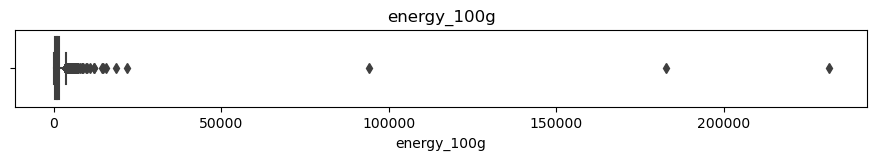

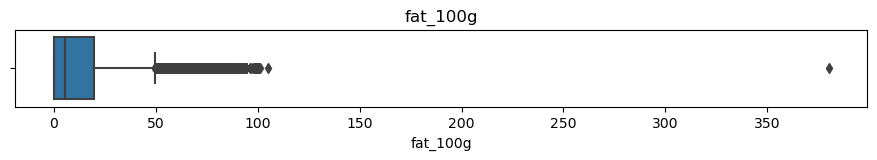

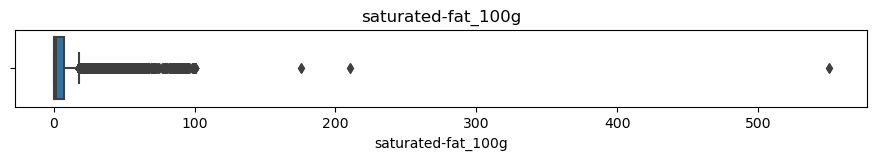

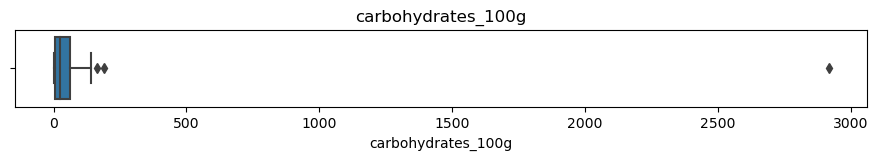

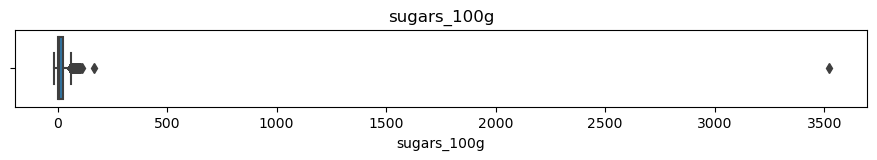

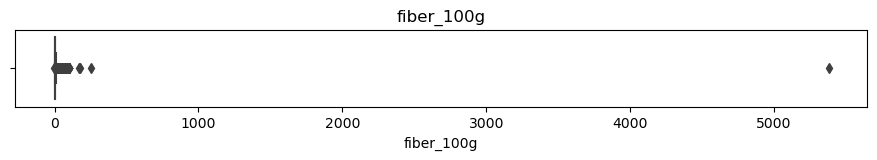

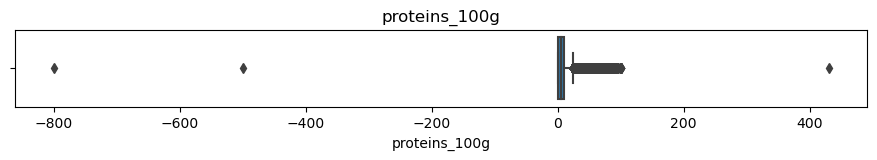

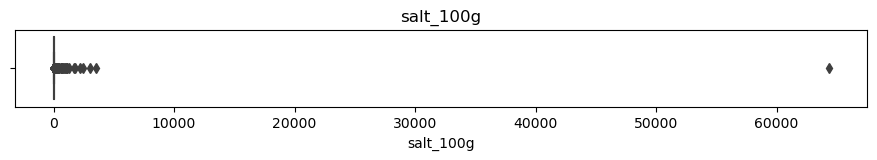

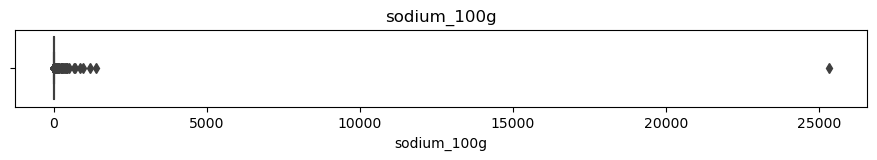

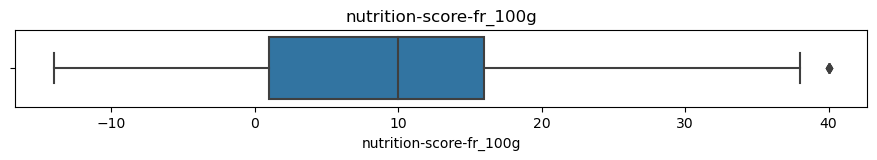

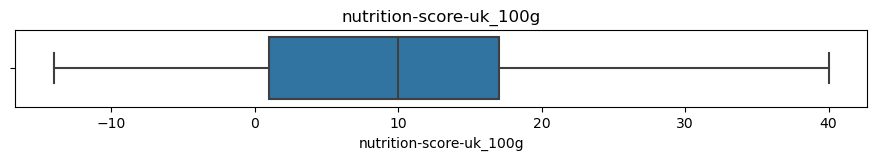

In [71]:
boxplot_Outliers(num_data)

In [72]:
#Fonction de detection des outliers en utilisants la méthode du boxplot 
def Detection_Outliers_Boxplot(data,min,max):
    
    Data_detection_Outliers=data.select_dtypes(include=[np.number])
    degrees = 90
    fig = plt.figure(figsize=(12, 6))
    axes = plt.axes()
    plt.xticks(rotation=degrees)
    axes.set_ylim([min,max])
    return sns.boxplot(Data_detection_Outliers).set_title('boxplot des variables');


Text(0.5, 1.0, 'boxplot des variables')

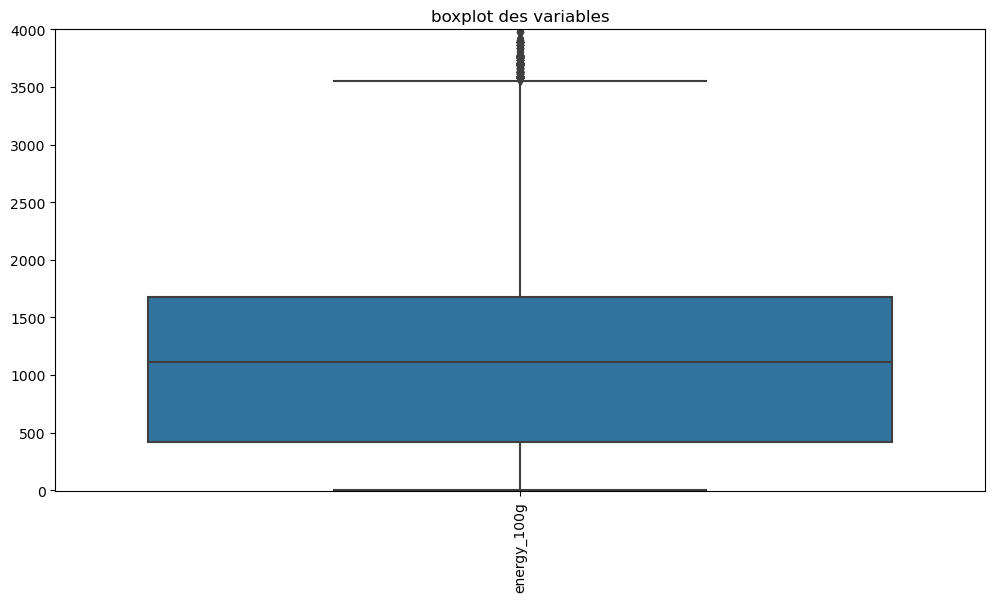

In [73]:
Detection_Outliers_Boxplot(num_data [['energy_100g']],-10,4000)

Text(0.5, 1.0, 'boxplot des variables')

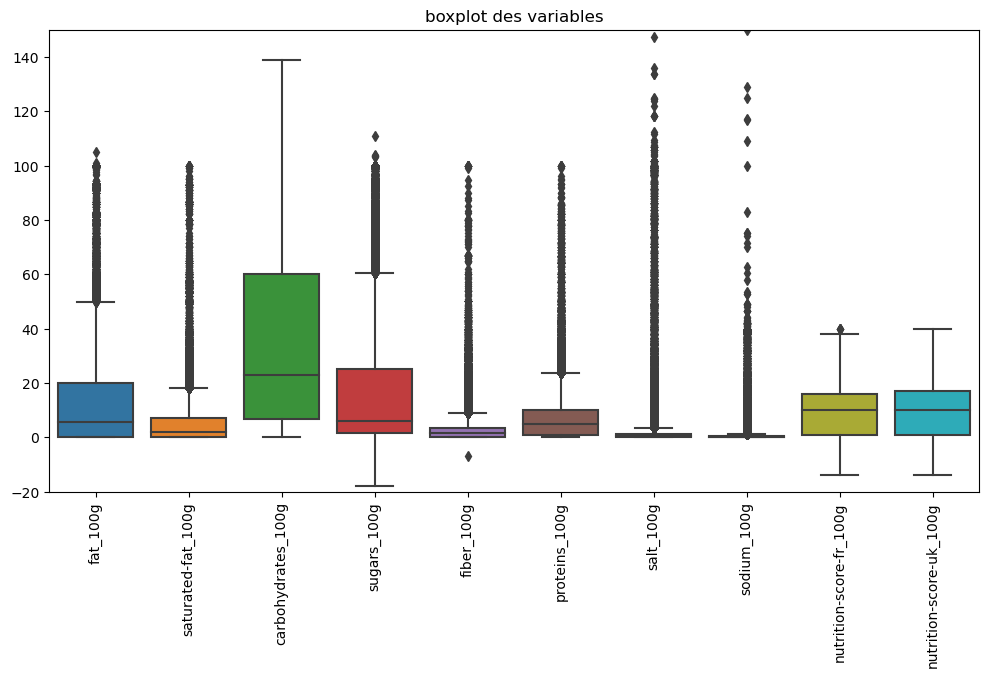

In [74]:
Detection_Outliers_Boxplot(num_data.drop(["energy_100g"], axis=1),-20,150)


# 3.3.2 Identifcation des outliers univariées

# 3.3.2.1 Identification des outliers IQR

In [75]:
#Cette méthode me permet de relever les points de données qui tombe en dehors de 1,5 fois 
#d’une plage interquartile au-dessus du 3e quartile Q3 et en dessous du 1er quartile Q1

def Detection_Outliers_IQR10(data,col) :
    Q1= data[col].quantile(0.25)
    Q3= data[col].quantile(0.75)
    IQR= Q3-Q1
    
    indexes_outliers5=[]
    Lower_Bound = Q1 - 1.5*IQR
    Upper_Bound = Q3 + 1.5*IQR
    
    Liste_outliers= data.index[ (data[col]< Lower_Bound) |  (data[col] > Upper_Bound)]
    return print ("Nombre des ouliers de la variable:",'"',col,'"',":",len (Liste_outliers),"outliers\n",Liste_outliers,
                  "\n=============================================================================================\n")
     


In [76]:
def Identification_Outliers_IQR10(data):
    n=0
    for i in data.columns :
        outliers=Detection_Outliers_IQR10(data,data.columns[n]) 
        n+=1
    return outliers

In [77]:
 Identification_Outliers_IQR10(num_data)

Nombre des ouliers de la variable: " energy_100g " : 952 outliers
 Int64Index([    98,    164,    531,    698,    772,   3977,   5440,   5867,
              6598,   6623,
            ...
            316771, 316772, 316993, 317235, 317448, 319695, 319806, 320269,
            320270, 320561],
           dtype='int64', length=952) 

Nombre des ouliers de la variable: " fat_100g " : 5872 outliers
 Int64Index([     3,     16,     23,     81,     82,     84,     85,     88,
                93,     98,
            ...
            320269, 320270, 320318, 320333, 320373, 320578, 320656, 320669,
            320692, 320717],
           dtype='int64', length=5872) 

Nombre des ouliers de la variable: " saturated-fat_100g " : 10641 outliers
 Int64Index([     1,      8,     30,     32,    107,    148,    164,    218,
               220,    287,
            ...
            320292, 320309, 320324, 320325, 320356, 320392, 320578, 320598,
            320656, 320676],
           dtype='int64', length=106

# 3.3.2.2 Identification des outliers Z-Score

In [78]:
def Detection_Outliers_Zscore(data,col,threshold) :
    z_score = (data[col] - data[col].mean())/ data[col].std()
    return data[np.abs(z_score)>threshold]


In [79]:
outliers4 = Detection_Outliers_Zscore(num_data,"energy_100g",3)
len (outliers4)

90

In [80]:
#Fonction de detection des variables qui contient des outliers 
def Identification_Outliers_Col(base):
    
    df=base.select_dtypes(include=[np.number])
    threshold = 3
    #Creation des liste vides 
    outliersdf = []
    indexvals = []
    colswithoutliers = []
    for col in df.columns:
        
        #Moyenne et ecart type par colonne
        mean = np.mean(df[col])
        std = np.std(df[col])
        
        #Identification des outliers par colonnes
        outliers = df.loc[((abs(df[col]-mean))/std) > threshold]
        
    return  outliers

In [81]:
liste_outliers_col = list(Identification_Outliers_Col(df_Data_Num))
liste_outliers_col

['energy_100g',
 'fat_100g',
 'saturated-fat_100g',
 'carbohydrates_100g',
 'sugars_100g',
 'fiber_100g',
 'proteins_100g',
 'salt_100g',
 'sodium_100g',
 'nutrition-score-fr_100g',
 'nutrition-score-uk_100g']

In [82]:
#Fonction de detection des outliers en utilisants la méthode  Z-score
def Identification_outliers_Zscore(base):
    
    df=base.select_dtypes(include=[np.number])
    threshold = 3
    #Creation des liste vides 
    outliersdf = []
    indexvals = []
    colswithoutliers = []
    for col in df.columns:
        
        #Moyenne et ecart type par colonne
        mean = np.mean(df[col])
        std = np.std(df[col])
        
        #Identification des outliers par colonnes
        outliers = df.loc[((abs(df[col]-mean))/std) > threshold]
      
        if len(outliers) == 0:
           
            pass 
        else:
            #i+=1
            outliersdf.append(outliers.values)
            indexvals.append(outliers.index.values)
            colswithoutliers.append(col)
    #Affichage des valeurs abérrantes par colonnes
    for number, item in enumerate(outliersdf):
        print('*************************')
        print('Variable: {}'.format(colswithoutliers[number]))
        print('*************************')
        
        df = pd.DataFrame(outliersdf[number], 
                           index=indexvals[number], 
                           columns=df.columns)
        print('Nombre des outliers : {}'.format(len(df[colswithoutliers[number]].values)))
        print('Index :{}'.format(indexvals[number]))
        print('\n')
        
    return print('Nombre total de variable ayant des outliers: %d\n' % len(df.columns),"La liste des variables qui contient des outliers :",outliers.columns)

In [83]:
Identification_outliers_Zscore(num_data)

*************************
Variable: energy_100g
*************************
Nombre des outliers : 90
Index :[   772   5440  15660  27849  35143  35372  46967  55852  55878  56561
  66156  80439  93949  93950 100992 104932 108364 108392 108464 114969
 115777 119184 119387 119389 128259 131974 133635 142141 176697 178787
 179586 181199 183135 187381 188751 188938 193248 199480 199505 199683
 204923 207590 208805 214697 215679 218448 218736 219497 219504 222738
 223318 229618 229737 231858 236013 236513 237814 240015 240071 242099
 245024 245311 246581 247152 249101 250717 251673 252865 254078 254093
 255845 256886 260589 264409 268346 272908 274490 275516 277678 285082
 286690 290157 293188 304297 305223 311783 313506 313852 319695 320561]


*************************
Variable: fat_100g
*************************
Nombre des outliers : 3085
Index :[    93     98    164 ... 320656 320669 320717]


*************************
Variable: saturated-fat_100g
*************************
Nombre des outli

In [84]:
df_Data_Num.shape

(221347, 16)

# 3.3.2 Suppression des outliers (des valeurs inférieure à 0g & supérieure à 100g)

In [85]:
#Suppression des outliers (valeurs comprise entre 0 et 100)
liste_outliers_col1= [ 'fat_100g', 'saturated-fat_100g','carbohydrates_100g','sugars_100g','fiber_100g','proteins_100g','salt_100g',
                   'sodium_100g','nutrition-score-fr_100g','nutrition-score-uk_100g']


df_Data_Num=df_Data_Num[~(df_Data_Num[liste_outliers_col1 ]<0).any(axis=1)]
df_Data_Num=df_Data_Num[~(df_Data_Num[liste_outliers_col1 ]>100).any(axis=1)]

#Nous allons traiter la variable energy_100g a part entiere car exprimé en KJ
#Une quantité d'énergie de plus de 3700kJ (la quantité maximale d'énergie qu'un produit peut avoir
# un aliment ne peut être plus calorique qu'un certain seuil: 900 calories maximum 
#Pour avoir la correspondance en kilojoules, il faut multiplier par 4.184 soit un seuil maximum de 3 766 kJ.

df_Data_Num=df_Data_Num[~(df_Data_Num[['energy_100g']]<0).any(axis=1)]
df_Data_Num=df_Data_Num[~(df_Data_Num[['energy_100g']]>3766).any(axis=1)]


print("Nombre de lignes et de colonnes restantes :",df_Data_Num.shape)


Nombre de lignes et de colonnes restantes : (195410, 16)


In [86]:
df_Data_Num.reset_index(inplace=True,drop=True)
df_Data_Num

,product_name,code,nutrition_grade_fr,ingredients_text,brands,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
0,Banana Chips Sweetened (Whole),4530,d,"Bananas, vegetable oil (coconut oil, corn oil ...",NaN,2243.0,28.57,28.57,64.29,14.29,3.6,3.57,0.00000,0.000,14.0,14.0
1,Organic Salted Nut Mix,16087,d,"Organic hazelnuts, organic cashews, organic wa...",Grizzlies,2540.0,57.14,5.36,17.86,3.57,7.1,17.86,1.22428,0.482,12.0,12.0
2,Breadshop Honey Gone Nuts Granola,16100,NaN,"Rolled oats, grape concentrate, expeller press...",Unfi,1933.0,18.27,1.92,63.46,11.54,7.7,13.46,NaN,NaN,NaN,NaN
3,Organic Dark Chocolate Minis,16193,NaN,"Organic chocolate liquor, organic raw cane sug...",Equal Exchange,2406.0,37.50,22.50,55.00,42.50,7.5,5.00,NaN,NaN,NaN,NaN
4,Organic Adzuki Beans,16612,NaN,Organic adzuki beans,Unfi,1393.0,1.04,NaN,62.50,NaN,12.5,22.92,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195405,Tomato & ricotta,9948282780603,NaN,NaN,Panzani,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
195406,"Mint Melange Tea A Blend Of Peppermint, Lemon ...",99567453,b,"Organic peppermint, organic lemon grass, organ...",Trader Joe's,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00000,0.000,0.0,0.0
195407,乐吧泡菜味薯片,9970229501521,NaN,NaN,乐吧,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
195408,Tomates aux Vermicelles,9980282863788,NaN,NaN,Knorr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [87]:
df_Data_Num.describe() 

,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
count,158366.000000,146109.000000,137037.000000,145820.000000,147740.000000,117786.000000,157479.000000,154026.000000,153990.000000,131801.000000,131801.000000
mean,1198.330490,13.970847,6.051725,33.846153,18.444887,2.556108,7.010706,1.737593,0.684250,11.711633,11.657218
std,780.404768,16.918907,8.194299,29.321621,22.054544,4.147407,8.181610,6.238967,2.456539,7.808968,7.938294
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,492.000000,0.100000,0.100000,6.670000,1.700000,0.000000,0.500000,0.100000,0.039370,4.000000,4.000000
50%,1205.000000,8.330000,3.200000,25.290000,8.330000,1.200000,4.760000,0.706120,0.278000,12.000000,12.000000
75%,1778.000000,22.400000,8.930000,60.000000,30.000000,3.500000,9.900000,1.524000,0.600000,18.000000,18.000000
max,3766.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,39.370079,40.000000,37.000000


# 3.4 **Gestion des données manquantes** 

# 3.4.1 Suppression des lignes où le nom du produit n'existe pas(contient des valeurs NaN)

In [88]:
df_Data_Num.columns

Index(['product_name', 'code', 'nutrition_grade_fr', 'ingredients_text',
       'brands', 'energy_100g', 'fat_100g', 'saturated-fat_100g',
       'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g',
       'salt_100g', 'sodium_100g', 'nutrition-score-fr_100g',
       'nutrition-score-uk_100g'],
      dtype='object')

In [89]:

Nb_Data_ManquantesIngerdients = df_Data_Num[['ingredients_text','brands']].isnull().values.sum()
print("Nombre NaN :", Nb_Data_ManquantesIngerdients)

#Suppression des lignes où le nom du produit n'existe pas(contient des valeurs NaN)
df_Data_Num= df_Data_Num.dropna(subset=['ingredients_text','brands'])
print("Nombre de lignes et colonnes restantes:", df_Data_Num.shape)

Nombre NaN : 54131
Nombre de lignes et colonnes restantes: (149857, 16)


# 3.4.2 Taux des données manquantes de chaque colonne

[]

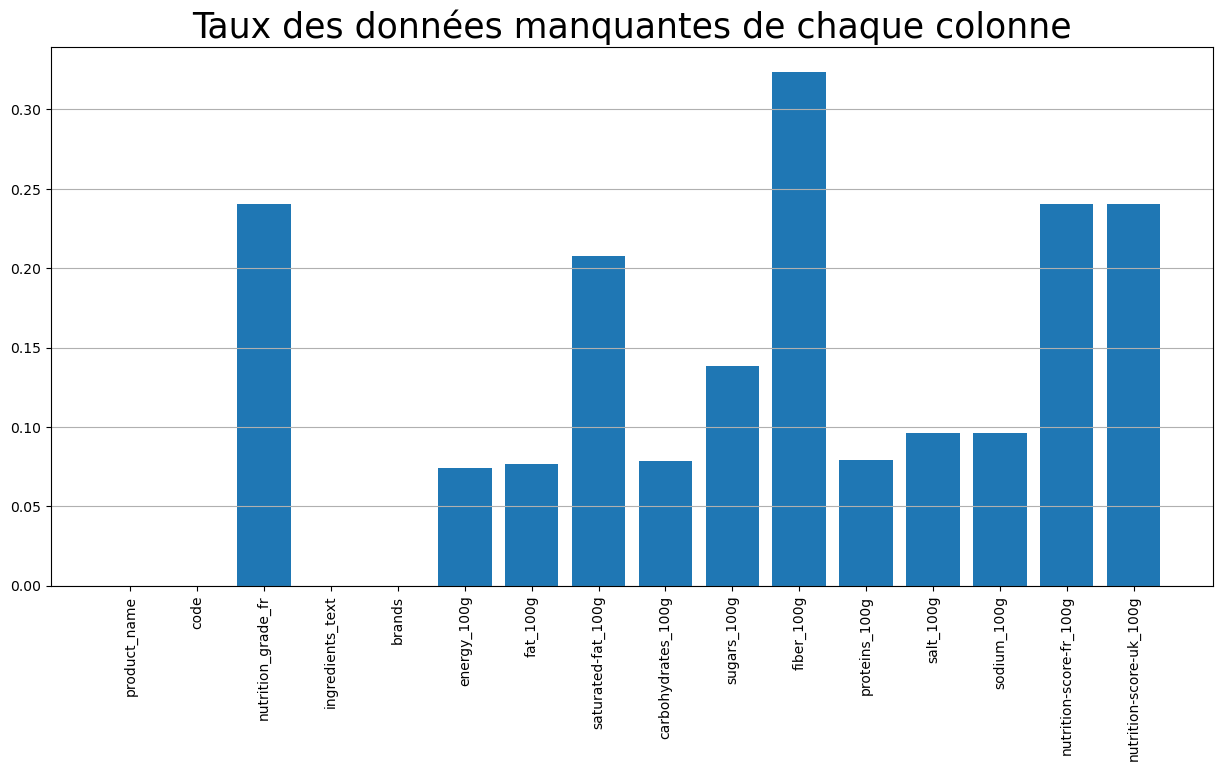

In [90]:
#Taux des données manquantes 
plt.figure(figsize=[15,7])
plt.title('Taux des données manquantes de chaque colonne',fontsize=25)
plt.bar(height=df_Data_Num.isna().mean(),x=df_Data_Num.columns)
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.plot()

Text(0.5, 1.0, 'Nombre de données sur chaque colonne')

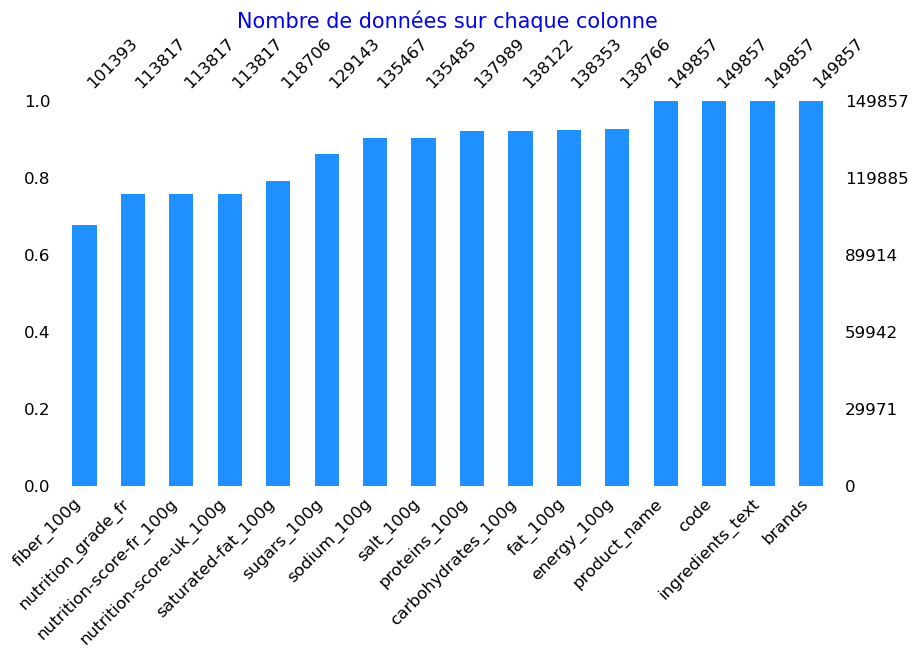

In [91]:
missingno.bar(df_Data_Num, color="dodgerblue", sort="ascending", figsize=(10,5), fontsize=12)
plt.title('Nombre de données sur chaque colonne',color='blue',fontsize=15)

In [92]:
#df_data["product_name"]
df_Data_Num.shape

(149857, 16)

Text(0.5, 1.0, 'Nombre de données qualitatives sur chaque colonne')

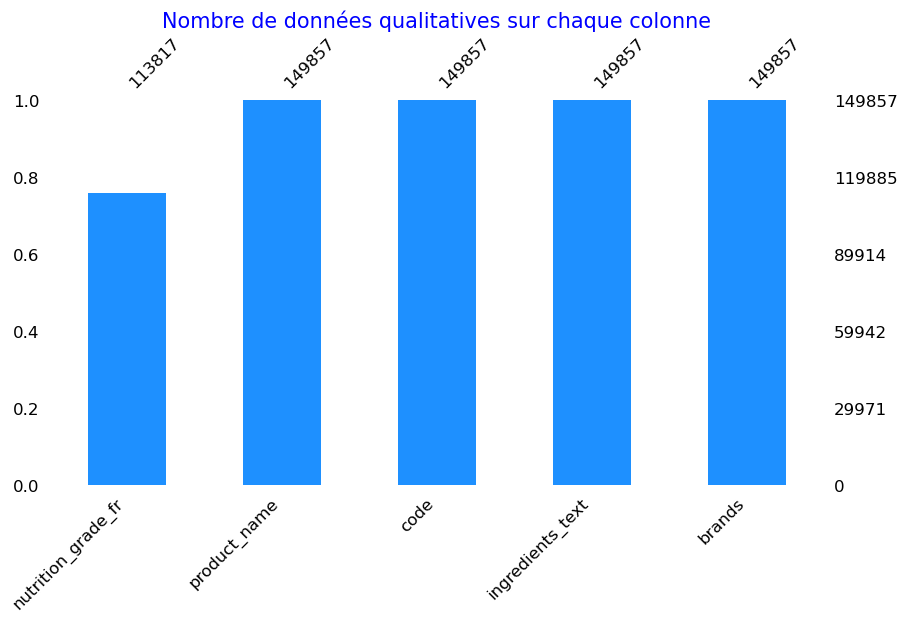

In [93]:
missingno.bar(df_Data_Num[cat_data.columns], color="dodgerblue", sort="ascending", figsize=(10,5), fontsize=12)
plt.title('Nombre de données qualitatives sur chaque colonne',color='blue',fontsize=15)

Text(0.5, 1.0, 'Nombre de données quantitatives sur chaque colonne')

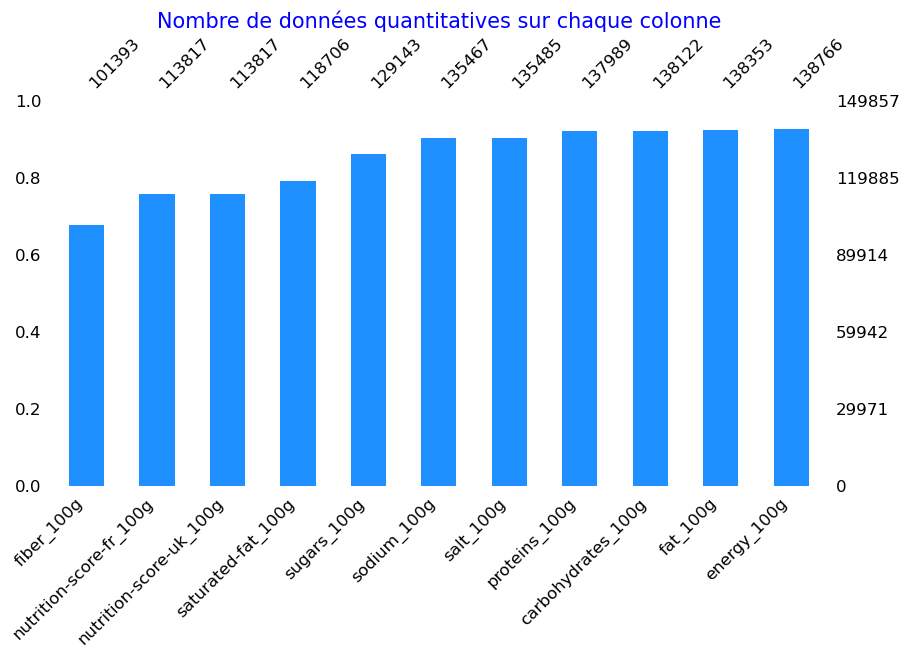

In [94]:
missingno.bar(df_Data_Num[num_data.columns], color="dodgerblue", sort="ascending", figsize=(10,5), fontsize=12)
plt.title('Nombre de données quantitatives sur chaque colonne',color='blue',fontsize=15)

<Axes: >

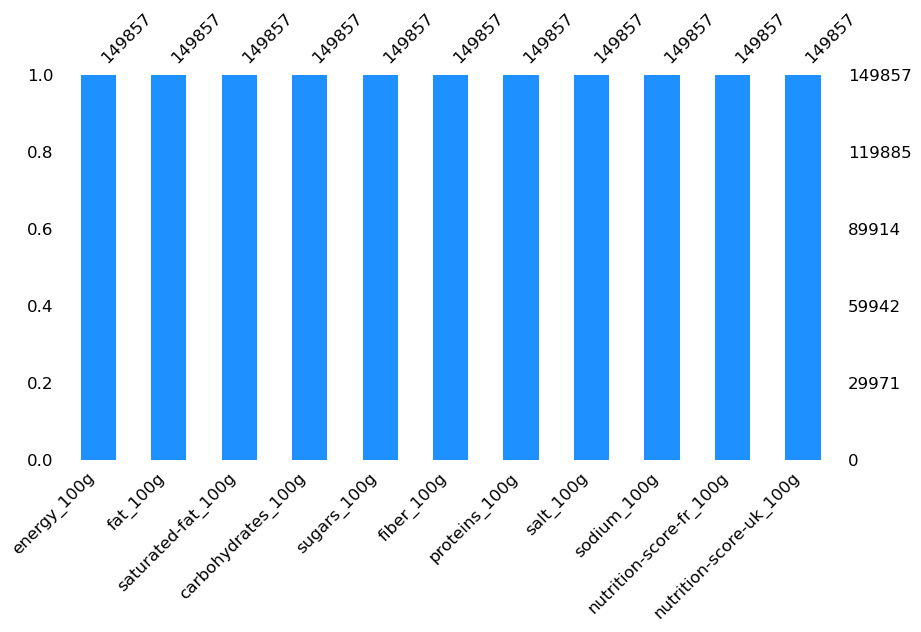

In [95]:
# Imputation
imputer = KNNImputer(n_neighbors=2, weights="uniform")
df_Data_Num[num_data.columns]=imputer.fit_transform(df_Data_Num[num_data.columns])
missingno.bar(df_Data_Num[num_data.columns], color="dodgerblue", sort="ascending", figsize=(10,5), fontsize=12)

Le jeux de données est rempli à 98.50%
et il a 1.50% de données manquantes
 
 


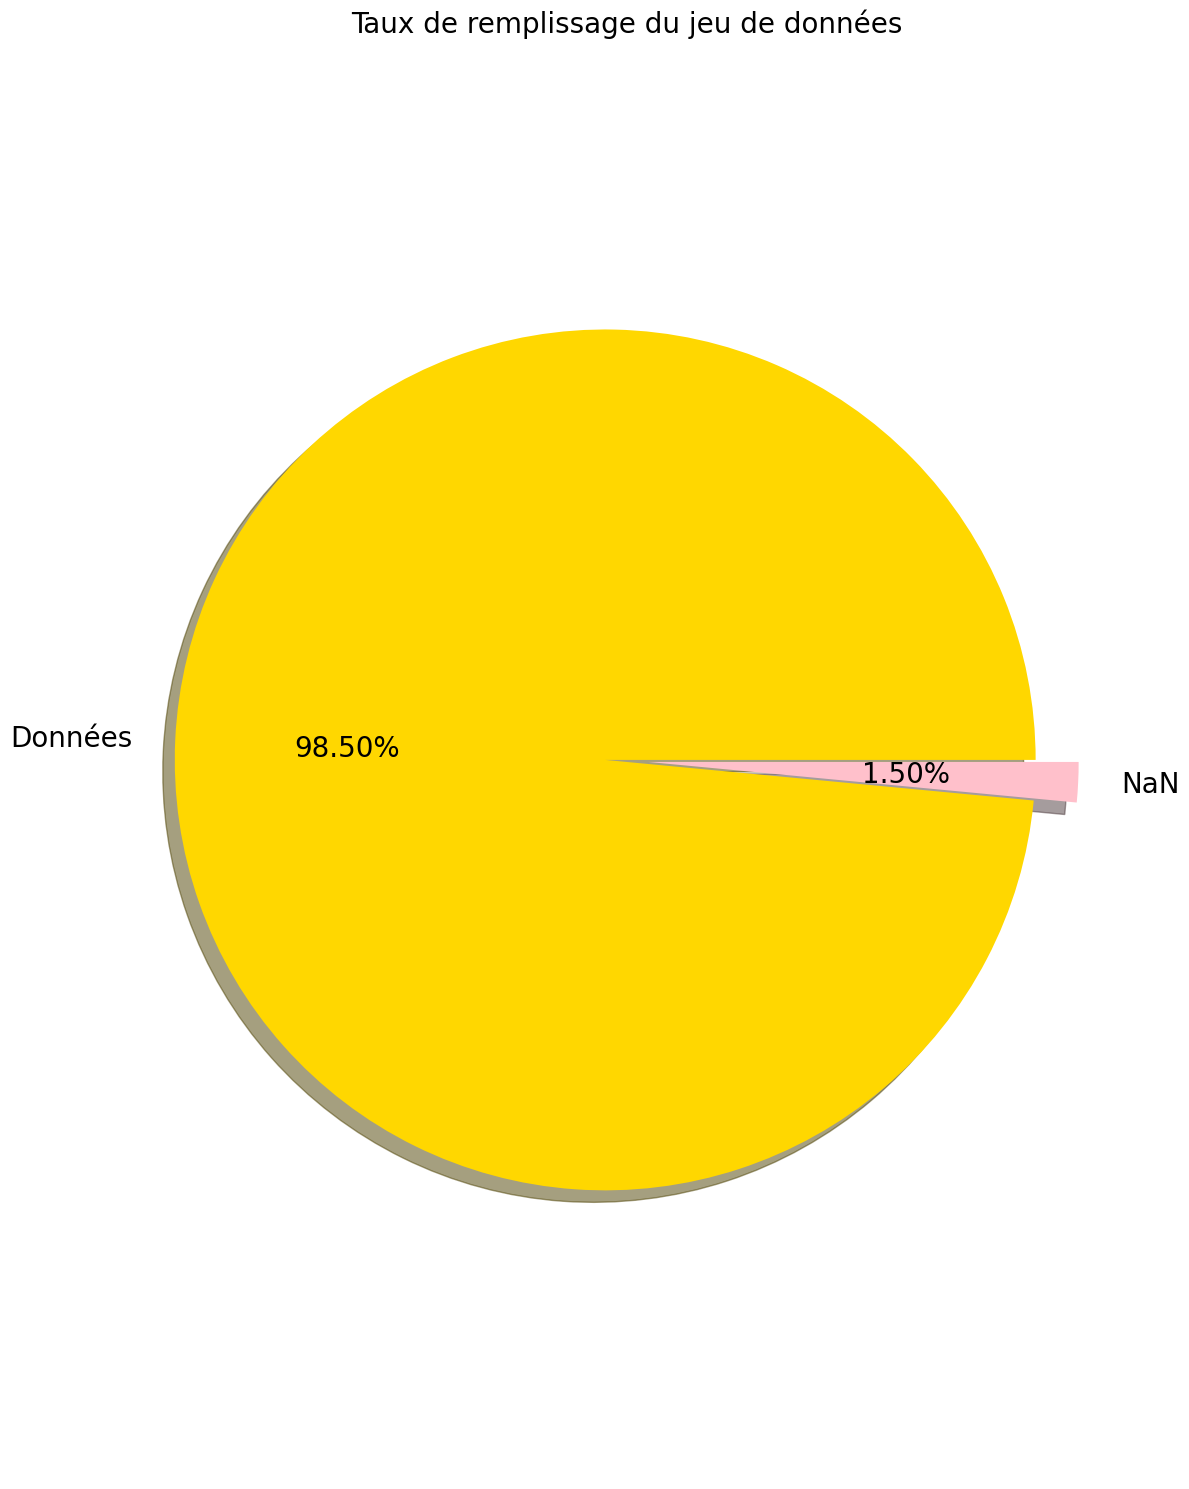

In [96]:
Graph_Pie_NaN(df_Data_Num)

In [97]:
Data_Missing_column(df_Data_Num)

product_name                   0
code                           0
ingredients_text               0
brands                         0
energy_100g                    0
fat_100g                       0
saturated-fat_100g             0
carbohydrates_100g             0
sugars_100g                    0
fiber_100g                     0
proteins_100g                  0
salt_100g                      0
sodium_100g                    0
nutrition-score-fr_100g        0
nutrition-score-uk_100g        0
nutrition_grade_fr         36040
dtype: int64

In [98]:
df_Data_Num['nutrition_grade_fr'].value_counts()

d    38697
c    27823
e    26907
b    20354
a       36
Name: nutrition_grade_fr, dtype: int64

In [99]:
df_Data_Num.shape

(149857, 16)

# **3.4 Sauvegarde des données cleanées dans un nouveau CSV**

In [100]:
df_Data_Num.to_csv("df_data_final.csv")